根据您的问题，我们可以通过**赔率反向比例公式**和**期望利润方程**重新设置赔率，以确保在事件a和b的下注比例为1:3时，赌场能稳定实现10%的利润。

### 已知条件

1. **投注比例**：a事件的投注比例为1，b事件的投注比例为3。
   - 设总投注金额为 $ S $，则：
     - **a事件的投注金额** $ M_A = S/4 $
     - **b事件的投注金额** $ M_B = 3S/4 $

2. **利润目标**：赌场希望获得10%的利润，即赌场的总支出为总投注金额的90%。

### 计算步骤

#### 1. 使用赔率反向比例设置初始关系

根据赔率反向比例关系，赔率应满足以下条件：

$$
\frac{p_A}{p_B} = \frac{M_B}{M_A} = 3
$$

所以我们可以设定一个变量 $ k $ 使得：

$$
p_A = 3k \quad \text{和} \quad p_B = k
$$

#### 2. 代入期望利润方程

赌场的总支出应等于总投注的90%，即满足以下条件：

$$
M_A \times p_A + M_B \times p_B = 0.9S
$$

代入 $ M_A = S/4 $ 和 $ M_B = 3S/4 $：

$$
\frac{S}{4} \times (3k) + \frac{3S}{4} \times k = 0.9S
$$

简化后得到：

$$
\frac{3S}{4}k + \frac{3S}{4}k = 0.9S
$$

进一步简化：

$$
\frac{6S}{4}k = 0.9S
$$

$$
1.5k = 0.9
$$

解得：

$$
k = 0.6
$$

#### 3. 得到最终赔率

将 $ k = 0.6 $ 代入，得到：

$$
p_A = 3 \times 0.6 = 1.8
$$
$$
p_B = 0.6
$$

### 结论

按照赌场设定的利润目标和投注比例，合适的赔率组合为：

- **a事件的赔率 $ p_A = 1.8 $**
- **b事件的赔率 $ p_B = 0.6 $**

这种赔率组合在满足投注比例的同时，确保赌场在不同结果下都可以获得10%的利润。

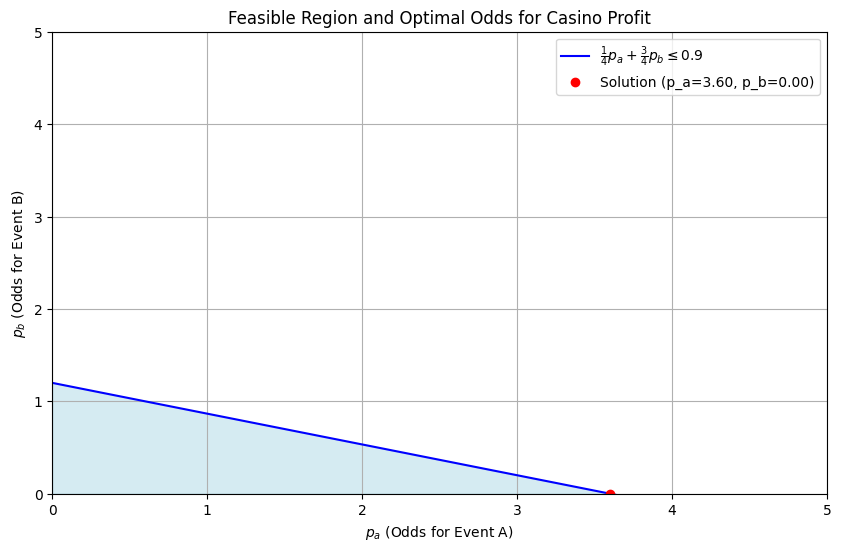

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
a_coeff, b_coeff = 1/4, 3/4
max_profit_constraint = 0.9
k = 0.6

# Calculated odds based on k
p_a_calculated = 3 * k  # Should be 1.8
p_b_calculated = k      # Should be 0.6

# Define p_a values and corresponding p_b values based on inverse proportional relationship (p_a = 3 * p_b)
p_a_vals_ratio = np.linspace(0, 3, 100)
p_b_vals_ratio = p_a_vals_ratio / 3  # Corresponds to p_a = 3 * p_b line

# Define p_b values for 90% payout constraint (profit target line)
p_a_vals = np.linspace(0, 3, 100)
p_b_vals_90_constraint = (max_profit_constraint - a_coeff * p_a_vals) / b_coeff

# Filter valid indices for the 90% payout line (target profit line)
valid_indices_90_constraint = p_b_vals_90_constraint >= 0
p_a_vals_90_constraint = p_a_vals[valid_indices_90_constraint]
p_b_vals_90_constraint = p_b_vals_90_constraint[valid_indices_90_constraint]

# Plotting
plt.figure(figsize=(10, 6))

# Plot 90% payout (10% profit) line
plt.plot(p_a_vals_90_constraint, p_b_vals_90_constraint, 
         label=r'$\frac{1}{4} p_a + \frac{3}{4} p_b \leq 0.9$ (90% payout)', color='b')
plt.fill_between(p_a_vals_90_constraint, 0, p_b_vals_90_constraint, 
                 where=(p_b_vals_90_constraint >= 0), color='lightblue', alpha=0.3)

# Plot odds ratio constraint line (p_a = 3 * p_b)
plt.plot(p_a_vals_ratio, p_b_vals_ratio, label=r'$p_a = 3 \times p_b$ (Odds Ratio Constraint)', color='green')

# Mark the calculated solution point
plt.plot(p_a_calculated, p_b_calculated, 'ro', label=f'Calculated Solution (p_a={p_a_calculated}, p_b={p_b_calculated})')

# Labels and title
plt.xlabel(r'$p_a$ (Odds for Event A)')
plt.ylabel(r'$p_b$ (Odds for Event B)')
plt.title('Feasible Regions with 10% Profit Target and Odds Ratio Constraint')
plt.legend()
plt.xlim(0, 3)
plt.ylim(0, 1.5)
plt.grid(True)

plt.show()